# Projeto Oficina Maker
## Estudantes: Felipe Ferro Ramires, Michael da Silva e Verônica Scheifer
## Análise de Dados e Experimentos Big Data


# **Importação**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as sp

In [ ]:
df = pd.read_csv("/content/2022-10-01_sigesguarda_-_Base_de_Dados.csv", sep=';', encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (16,20,21,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **Informação do dataset**

In [ ]:
df.head()

QUANTIDADE_OCORRENCIA  ATENDIMENTO_ANO ATENDIMENTO_BAIRRO_NOME  \
0                      1           2009.0       CIDADE INDUSTRIAL   
1                      1           2009.0              FAZENDINHA   
2                      1           2009.0                 UBERABA   
3                      1           2009.0           SÍTIO CERCADO   
4                      1           2009.0               TATUQUARA   

                EQUIPAMENTO_URBANO_NOME FLAG_EQUIPAMENTO_URBANO  \
0                                   NaN                     NÃO   
1                  BOSQUE DA FAZENDINHA                     SIM   
2                                   NaN                     NÃO   
3                                   NaN                     NÃO   
4  CENTRO DE ESPORTE E LAZER SANTA RITA                     SIM   

  FLAG_FLAGRANTE                   LOGRADOURO_NOME  NATUREZA1_DEFESA_CIVIL  \
0            NÃO              DAVI XAVIER DA SILVA                       0   
1            NÃO                     CARLOS KLEMTZ                       0   
2            NÃO  DOUTOR JOÃO DE PAULA MOURA BRITO                       0   
3            NÃO  EDGARD CAVALCANTI DE ALBUQUERQUE                       0   
4            NÃO            CARLOS MUNHOZ DA ROCHA                       0   

  NATUREZA1_DESCRICAO  NATUREZA2_DEFESA_CIVIL  ... OCORRENCIA_HORA  \
0             Alarmes                     NaN  ...        15:14:00   
1               Roubo                     NaN  ...        15:22:00   
2             Animais                     NaN  ...        15:59:00   
3             Animais                     NaN  ...        16:13:00   
4             Alarmes                     NaN  ...        16:29:00   

   OCORRENCIA_MES OPERACAO_DESCRICAO  ORIGEM_CHAMADO_DESCRICAO  \
0               1                NaN                         .   
1               1                NaN                       153   
2               1                NaN                       156   
3               1                NaN                       156   
4               1                NaN                         .   

  REGIONAL_FATO_NOME                     SECRETARIA_NOME SECRETARIA_SIGLA  \
0                CIC             FUNDAÇÃO DE AÇÃO SOCIAL              FAS   
1             PORTÃO  SECRETARIA MUNICIPAL MEIO AMBIENTE             SMMA   
2             CAJURU       SECRETARIA MUNICIPAL DA SAÚDE              SMS   
3        BAIRRO NOVO       SECRETARIA MUNICIPAL DA SAÚDE              SMS   
4        PINHEIRINHO             FUNDAÇÃO DE AÇÃO SOCIAL              FAS   

  SERVICO_NOME SITUACAO_EQUIPE_DESCRICAO NUMERO_PROTOCOLO_156  
0         SIGA                       NaN                  NaN  
1       NORMAL                       NaN                  NaN  
2        SACAF                       NaN            2640856.0  
3        SACAF                       NaN            2640854.0  
4         SIGA                       NaN                  NaN  

[5 rows x 36 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419071 entries, 0 to 419070
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   QUANTIDADE_OCORRENCIA      419071 non-null  int64  
 1   ATENDIMENTO_ANO            418982 non-null  float64
 2   ATENDIMENTO_BAIRRO_NOME    418926 non-null  object 
 3   EQUIPAMENTO_URBANO_NOME    150028 non-null  object 
 4   FLAG_EQUIPAMENTO_URBANO    419071 non-null  object 
 5   FLAG_FLAGRANTE             419071 non-null  object 
 6   LOGRADOURO_NOME            419071 non-null  object 
 7   NATUREZA1_DEFESA_CIVIL     419071 non-null  int64  
 8   NATUREZA1_DESCRICAO        419071 non-null  object 
 9   NATUREZA2_DEFESA_CIVIL     21841 non-null   float64
 10  NATUREZA2_DESCRICAO        21841 non-null   object 
 11  NATUREZA3_DEFESA_CIVIL     1645 non-null    float64
 12  NATUREZA3_DESCRICAO        1645 non-null    object 
 13  NATUREZA4_DEFESA_CIVIL     27

In [ ]:
df.describe()

QUANTIDADE_OCORRENCIA  ATENDIMENTO_ANO  NATUREZA1_DEFESA_CIVIL  \
count               419071.0     418982.00000           419071.000000   
mean                     1.0       2016.65204                0.025874   
std                      0.0          4.14695                0.158759   
min                      1.0       2009.00000                0.000000   
25%                      1.0       2013.00000                0.000000   
50%                      1.0       2018.00000                0.000000   
75%                      1.0       2020.00000                0.000000   
max                      1.0       2022.00000                1.000000   

       NATUREZA2_DEFESA_CIVIL  NATUREZA3_DEFESA_CIVIL  NATUREZA4_DEFESA_CIVIL  \
count            21841.000000             1645.000000              279.000000   
mean                 0.020008                0.013374                0.014337   
std                  0.140031                0.114904                0.119089   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%                  0.000000                0.000000                0.000000   
max                  1.000000                1.000000                1.000000   

       NATUREZA5_DEFESA_CIVIL  OCORRENCIA_ANO  OCORRENCIA_CODIGO  \
count                    61.0   419071.000000      419071.000000   
mean                      0.0     2016.652827      209828.107619   
std                       0.0        4.147116      121084.958945   
min                       0.0     2009.000000           1.000000   
25%                       0.0     2013.000000      104956.500000   
50%                       0.0     2018.000000      209874.000000   
75%                       0.0     2020.000000      314676.500000   
max                       0.0     2022.000000      419537.000000   

       OCORRENCIA_MES  NUMERO_PROTOCOLO_156  
count   419071.000000          1.210900e+04  
mean         6.372899          6.219774e+06  
std          3.371743          2.482543e+06  
min          1.000000          2.640854e+06  
25%          3.000000          3.700108e+06  
50%          6.000000          6.168605e+06  
75%          9.000000          8.739328e+06  
max         12.000000          9.704277e+06

# **Tratamento de dados**

Contagem de dados nulos

In [ ]:
def contagemNulos(tabela):
  for col in tabela.columns:
   if tabela[col].isnull().sum():
    total_null=tabela[col].isnull().sum() 
    print('Column: {} total null {}, i.e. {} %'.format(col,total_null,round(total_null*100/len(df),2)))

In [ ]:
dfContagemNulos = contagemNulos(df)

Column: ATENDIMENTO_ANO total null 89, i.e. 0.02 %
Column: ATENDIMENTO_BAIRRO_NOME total null 145, i.e. 0.03 %
Column: EQUIPAMENTO_URBANO_NOME total null 269043, i.e. 64.2 %
Column: NATUREZA2_DEFESA_CIVIL total null 397230, i.e. 94.79 %
Column: NATUREZA2_DESCRICAO total null 397230, i.e. 94.79 %
Column: NATUREZA3_DEFESA_CIVIL total null 417426, i.e. 99.61 %
Column: NATUREZA3_DESCRICAO total null 417426, i.e. 99.61 %
Column: NATUREZA4_DEFESA_CIVIL total null 418792, i.e. 99.93 %
Column: NATUREZA4_DESCRICAO total null 418792, i.e. 99.93 %
Column: NATUREZA5_DEFESA_CIVIL total null 419010, i.e. 99.99 %
Column: NATUREZA5_DESCRICAO total null 419010, i.e. 99.99 %
Column: SUBCATEGORIA1_DESCRICAO total null 129206, i.e. 30.83 %
Column: SUBCATEGORIA2_DESCRICAO total null 405625, i.e. 96.79 %
Column: SUBCATEGORIA3_DESCRICAO total null 418133, i.e. 99.78 %
Column: SUBCATEGORIA4_DESCRICAO total null 418937, i.e. 99.97 %
Column: SUBCATEGORIA5_DESCRICAO total null 419041, i.e. 99.99 %
Column: OPERAC

## **Análise de variáveis com quantidades agrupadas**

- Tratmentos de dados e criação de um dataframe com as quantidades agrupadas

In [ ]:
df['OCORRENCIA_DATA'] = pd.to_datetime(df.OCORRENCIA_DATA, format='%Y-%m-%d')

In [ ]:
df['OCORRENCIA_DATA'] = df['OCORRENCIA_DATA'].dt.strftime('%Y-%m-%d')

In [ ]:
df['OCORRENCIA_DATA']

0         2009-01-01
1         2009-01-01
2         2009-01-01
3         2009-01-01
4         2009-01-01
             ...    
419066    2022-10-01
419067    2022-10-01
419068    2022-10-01
419069    2022-09-30
419070    2022-10-01
Name: OCORRENCIA_DATA, Length: 419071, dtype: object

In [ ]:
df2 = df.groupby(['ATENDIMENTO_ANO','OCORRENCIA_ANO', "ATENDIMENTO_BAIRRO_NOME", "FLAG_FLAGRANTE", "NATUREZA1_DESCRICAO", "OCORRENCIA_DATA", "OCORRENCIA_DIA_SEMANA", "REGIONAL_FATO_NOME" ])['QUANTIDADE_OCORRENCIA'].sum().reset_index()

In [ ]:
df2

ATENDIMENTO_ANO  OCORRENCIA_ANO ATENDIMENTO_BAIRRO_NOME  \
0                2009.0            2009               ABRANCHES   
1                2009.0            2009               ABRANCHES   
2                2009.0            2009               ABRANCHES   
3                2009.0            2009               ABRANCHES   
4                2009.0            2009               ABRANCHES   
...                 ...             ...                     ...   
324458           2022.0            2022              ÁGUA VERDE   
324459           2022.0            2022              ÁGUA VERDE   
324460           2022.0            2022              ÁGUA VERDE   
324461           2022.0            2022              ÁGUA VERDE   
324462           2022.0            2022              ÁGUA VERDE   

       FLAG_FLAGRANTE                              NATUREZA1_DESCRICAO  \
0                 NÃO                                             AIFU   
1                 NÃO                                             AIFU   
2                 NÃO                                             AIFU   
3                 NÃO                                       Alagamento   
4                 NÃO                                          Alarmes   
...               ...                                              ...   
324458            SIM                                         Trânsito   
324459            SIM                                          Veículo   
324460            SIM  Violação de Medida Protetiva Lei Maria da Penha   
324461            SIM  Violação de Medida Protetiva Lei Maria da Penha   
324462            SIM                                 ZELADORIA URBANA   

       OCORRENCIA_DATA OCORRENCIA_DIA_SEMANA REGIONAL_FATO_NOME  \
0           2009-05-17               DOMINGO          BOA VISTA   
1           2009-05-28                QUINTA          BOA VISTA   
2           2009-07-23                QUINTA          BOA VISTA   
3           2009-11-16               SEGUNDA          BOA VISTA   
4           2009-09-03                QUINTA          BOA VISTA   
...                ...                   ...                ...   
324458      2022-05-07                SÁBADO             PORTÃO   
324459      2022-03-24                QUINTA             PORTÃO   
324460      2022-03-26                SÁBADO             PORTÃO   
324461      2022-04-11               SEGUNDA             PORTÃO   
324462      2022-03-16                QUARTA             PORTÃO   

        QUANTIDADE_OCORRENCIA  
0                           1  
1                           1  
2                           1  
3                           1  
4                           1  
...                       ...  
324458                      1  
324459                      1  
324460                      1  
324461                      1  
324462                      1  

[324463 rows x 9 columns]

- Quantidade de ocorrencias atendidas por ano (ATENDIMENTO_ANO)

In [ ]:
ocorrenciasAtendidasPorAno = df.groupby(['ATENDIMENTO_ANO'])['QUANTIDADE_OCORRENCIA'].sum().reset_index()

In [ ]:
ocorrenciasAtendidasPorAno = ocorrenciasAtendidasPorAno.rename({'QUANTIDADE_OCORRENCIA': 'Quantidade_Ocorrencias_Atendidas_Por_Ano'}, axis=1)

In [ ]:
ocorrenciasAtendidasPorAno

ATENDIMENTO_ANO  Quantidade_Ocorrencias_Atendidas_Por_Ano
0            2009.0                                     24903
1            2010.0                                     22531
2            2011.0                                     21481
3            2012.0                                     19778
4            2013.0                                     24468
5            2014.0                                     25292
6            2015.0                                     25566
7            2016.0                                     21470
8            2017.0                                     22133
9            2018.0                                     24155
10           2019.0                                     33754
11           2020.0                                     57457
12           2021.0                                     58726
13           2022.0                                     37268

In [ ]:
ocorrenciasAtendidasPorAno.describe()

ATENDIMENTO_ANO  Quantidade_Ocorrencias_Atendidas_Por_Ano
count          14.0000                                 14.000000
mean         2015.5000                              29927.285714
std             4.1833                              12848.177108
min          2009.0000                              19778.000000
25%          2012.2500                              22232.500000
50%          2015.5000                              24685.500000
75%          2018.7500                              31707.000000
max          2022.0000                              58726.000000

- Quantidade de ocorrencias registradas por ano (OCORRENCIA_ANO)

In [ ]:
ocorrenciasRegistradasPorAno = df.groupby(['OCORRENCIA_ANO'])['QUANTIDADE_OCORRENCIA'].sum().reset_index()

In [ ]:
ocorrenciasRegistradasPorAno = ocorrenciasRegistradasPorAno.rename({'QUANTIDADE_OCORRENCIA': 'Quantidade_Ocorrencias_Registradas_Por_Ano'}, axis=1)

In [ ]:
ocorrenciasRegistradasPorAno

OCORRENCIA_ANO  Quantidade_Ocorrencias_Registradas_Por_Ano
0             2009                                       24903
1             2010                                       22531
2             2011                                       21484
3             2012                                       19776
4             2013                                       24470
5             2014                                       25303
6             2015                                       25566
7             2016                                       21469
8             2017                                       22137
9             2018                                       24153
10            2019                                       33762
11            2020                                       57453
12            2021                                       58731
13            2022                                       37333

In [ ]:
ocorrenciasRegistradasPorAno.describe()

OCORRENCIA_ANO  Quantidade_Ocorrencias_Registradas_Por_Ano
count         14.0000                                   14.000000
mean        2015.5000                                29933.642857
std            4.1833                                12850.963637
min         2009.0000                                19776.000000
25%         2012.2500                                22235.500000
50%         2015.5000                                24686.500000
75%         2018.7500                                31713.000000
max         2022.0000                                58731.000000

- Quantidade de ocorrencias por bairro (ATENDIMENTO_BAIRRO_NOME)

In [ ]:
ocorrenciasPorBairro = df.groupby(['ATENDIMENTO_BAIRRO_NOME'])['QUANTIDADE_OCORRENCIA'].sum().reset_index()

In [ ]:
ocorrenciasPorBairro = ocorrenciasPorBairro.rename({'QUANTIDADE_OCORRENCIA': 'Quantidade_Ocorrencias_Registradas_Por_Bairro'}, axis=1)

In [ ]:
ocorrenciasPorBairro

ATENDIMENTO_BAIRRO_NOME  Quantidade_Ocorrencias_Registradas_Por_Bairro
0             JARDIM OSASCO                                              1
1       JARDIM PEDRO DEMETE                                              1
2                 ABRANCHES                                           2143
3               AFONSO PENA                                              1
4              AFONSO PENA                                               1
..                      ...                                            ...
186            VISTA ALEGRE                                           1499
187                   XAXIM                                           6768
188                   fanny                                              1
189              ÁGUA VERDE                                           7634
190             ÁGUAS BELAS                                              3

[191 rows x 2 columns]

In [ ]:
ocorrenciasPorBairro.describe()

Quantidade_Ocorrencias_Registradas_Por_Bairro
count                                     191.000000
mean                                     2193.329843
std                                      6505.865766
min                                         1.000000
25%                                         1.000000
50%                                         2.000000
75%                                      1996.500000
max                                     72247.000000

- Quantidade de ocorrencias com flagrante (FLAG_FLAGRANTE)

In [ ]:
ocorrenciasFlagrante = df.groupby(['FLAG_FLAGRANTE'])['QUANTIDADE_OCORRENCIA'].sum().reset_index()

In [ ]:
ocorrenciasFlagrante = ocorrenciasFlagrante.rename({'QUANTIDADE_OCORRENCIA': 'Quantidade_Ocorrencias_Flagrante'}, axis=1)

In [ ]:
ocorrenciasFlagrante

FLAG_FLAGRANTE  Quantidade_Ocorrencias_Flagrante
0            NÃO                            400210
1            SIM                             18861

- Quantidade de ocorrencias por tipo (NATUREZA1_DESCRICAO)

In [ ]:
ocorrenciasPorTipo = df.groupby(['NATUREZA1_DESCRICAO'])['QUANTIDADE_OCORRENCIA'].sum().reset_index()

In [ ]:
ocorrenciasPorTipo = ocorrenciasPorTipo.rename({'QUANTIDADE_OCORRENCIA': 'Quantidade_Ocorrencias_Por_Tipo'}, axis=1)

In [ ]:
ocorrenciasPorTipo

NATUREZA1_DESCRICAO  Quantidade_Ocorrencias_Por_Tipo
0                    AIFU                              662
1           Abalo Sísmico                                2
2      Abandono de função                                4
3     Abandono de incapaz                              157
4      Abuso de incapazes                               51
..                    ...                              ...
182              Vistoria                             3751
183      ZELADORIA URBANA                             1398
184                 Óbito                              156
185  Óbito (Defesa Civil)                                1
186      Órgãos acionados                               77

[187 rows x 2 columns]

In [ ]:
ocorrenciasPorTipo.describe()

Quantidade_Ocorrencias_Por_Tipo
count                       187.000000
mean                       2241.021390
std                        7660.677328
min                           1.000000
25%                          11.000000
50%                          69.000000
75%                         554.500000
max                       67967.000000

- Quantidade de ocorrencias por dia (OCORRENCIA_DATA)

In [ ]:
ocorrenciasPorDia = df.groupby(['OCORRENCIA_DATA'])['QUANTIDADE_OCORRENCIA'].sum().reset_index()

In [ ]:
ocorrenciasPorDia = ocorrenciasPorDia.rename({'QUANTIDADE_OCORRENCIA': 'Quantidade_Ocorrencias_Por_Dia'}, axis=1)

In [ ]:
ocorrenciasPorDia

OCORRENCIA_DATA  Quantidade_Ocorrencias_Por_Dia
0         2009-01-01                              30
1         2009-01-02                              81
2         2009-01-03                              96
3         2009-01-04                              93
4         2009-01-05                              59
...              ...                             ...
5017      2022-09-27                             135
5018      2022-09-28                             125
5019      2022-09-29                             149
5020      2022-09-30                             164
5021      2022-10-01                               8

[5022 rows x 2 columns]

In [ ]:
ocorrenciasPorDia.describe()

Quantidade_Ocorrencias_Por_Dia
count                     5022.000000
mean                        83.447033
std                         44.620405
min                          2.000000
25%                         56.000000
50%                         69.000000
75%                         95.000000
max                        606.000000

- Quantidade de ocorrencias por dia da semana (OCORRENCIA_DIA_SEMANA)

In [ ]:
ocorrenciasPorDiaDaSemana = df.groupby(['OCORRENCIA_DIA_SEMANA'])['QUANTIDADE_OCORRENCIA'].sum().reset_index()

In [ ]:
ocorrenciasPorDiaDaSemana = ocorrenciasPorDiaDaSemana.rename({'QUANTIDADE_OCORRENCIA': 'Quantidade_Ocorrencias_Por_Dia_Da_Semana'}, axis=1)

In [ ]:
ocorrenciasPorDiaDaSemana

OCORRENCIA_DIA_SEMANA  Quantidade_Ocorrencias_Por_Dia_Da_Semana
0               DOMINGO                                     64524
1                QUARTA                                     57177
2                QUINTA                                     59549
3               SEGUNDA                                     53472
4                 SEXTA                                     61533
5                SÁBADO                                     67692
6                 TERÇA                                     55124

- Quantidade de ocorrencias por regional (REGIONAL_FATO_NOME)

In [ ]:
ocorrenciasPorRegional = df.groupby(['REGIONAL_FATO_NOME'])['QUANTIDADE_OCORRENCIA'].sum().reset_index()

In [ ]:
ocorrenciasPorRegional = ocorrenciasPorRegional.rename({'QUANTIDADE_OCORRENCIA': 'Quantidade_Ocorrencias_Por_Regional'}, axis=1)

In [ ]:
ocorrenciasPorRegional

REGIONAL_FATO_NOME  Quantidade_Ocorrencias_Por_Regional
0            BAIRRO NOVO                                29831
1              BOA VISTA                                43063
2              BOQUEIRÃO                                38847
3                 CAJURU                                36306
4                    CIC                                31537
5                 Cajuru                                    1
6                 MATRIZ                               131935
7            PINHEIRINHO                                29299
8                 PORTÃO                                38078
9            Pinheirinho                                    1
10                Portão                                    1
11  REGIÃO METROPOLITANA                                  430
12      SANTA FELICIDADE                                29980
13             TATUQUARA                                 9751

# **Análise descritiva de dados**

In [ ]:
tabelas = [ocorrenciasAtendidasPorAno, ocorrenciasRegistradasPorAno, ocorrenciasPorBairro, ocorrenciasFlagrante,
           ocorrenciasPorTipo, ocorrenciasPorDia, ocorrenciasPorDiaDaSemana, ocorrenciasPorRegional]

### - Medidas de posição

In [ ]:
#Média

def calculaMedia(tabela):

    media = tabela.mean()

    media = pd.DataFrame({'metricas':media.index, 'media':media.values})
    
    return media

In [ ]:
medias = []
for i in tabelas: 
  medias.append(calculaMedia(i))
  
dfMedia = pd.concat(medias)
dfMedia

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


metricas          media
0                                ATENDIMENTO_ANO    2015.500000
1       Quantidade_Ocorrencias_Atendidas_Por_Ano   29927.285714
0                                 OCORRENCIA_ANO    2015.500000
1     Quantidade_Ocorrencias_Registradas_Por_Ano   29933.642857
0  Quantidade_Ocorrencias_Registradas_Por_Bairro    2193.329843
0               Quantidade_Ocorrencias_Flagrante  209535.500000
0                Quantidade_Ocorrencias_Por_Tipo    2241.021390
0                 Quantidade_Ocorrencias_Por_Dia      83.447033
0       Quantidade_Ocorrencias_Por_Dia_Da_Semana   59867.285714
0            Quantidade_Ocorrencias_Por_Regional   29932.857143

In [ ]:
#Mediana

def calculaMediana(tabela):

    mediana = tabela.median()

    mediana = pd.DataFrame({'metricas':mediana.index, 'mediana':mediana.values})
    
    return mediana

In [ ]:
medianas = []
for i in tabelas: 
  medianas.append(calculaMediana(i))
  
dfMediana = pd.concat(medianas)
dfMediana

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_o

metricas   mediana
0                                ATENDIMENTO_ANO    2015.5
1       Quantidade_Ocorrencias_Atendidas_Por_Ano   24685.5
0                                 OCORRENCIA_ANO    2015.5
1     Quantidade_Ocorrencias_Registradas_Por_Ano   24686.5
0  Quantidade_Ocorrencias_Registradas_Por_Bairro       2.0
0               Quantidade_Ocorrencias_Flagrante  209535.5
0                Quantidade_Ocorrencias_Por_Tipo      69.0
0                 Quantidade_Ocorrencias_Por_Dia      69.0
0       Quantidade_Ocorrencias_Por_Dia_Da_Semana   59549.0
0            Quantidade_Ocorrencias_Por_Regional   29905.5

### - Medidas de dispersão

In [ ]:
#Variancia (valores ao quadrado)
#Distância dos termos com relação a média
#Quanto menor, melhor e mais próximo a média

def calculaVariancia(tabela):

    var = tabela.var()

    var = pd.DataFrame({'metricas':var.index, 'var':var.values})
    
    return var

In [ ]:
variancias = []
for i in tabelas: 
  variancias.append(calculaVariancia(i))
  
dfVariancia = pd.concat(variancias)
dfVariancia

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


metricas           var
0                                ATENDIMENTO_ANO  1.750000e+01
1       Quantidade_Ocorrencias_Atendidas_Por_Ano  1.650757e+08
0                                 OCORRENCIA_ANO  1.750000e+01
1     Quantidade_Ocorrencias_Registradas_Por_Ano  1.651473e+08
0  Quantidade_Ocorrencias_Registradas_Por_Bairro  4.232629e+07
0               Quantidade_Ocorrencias_Flagrante  7.271353e+10
0                Quantidade_Ocorrencias_Por_Tipo  5.868598e+07
0                 Quantidade_Ocorrencias_Por_Dia  1.990981e+03
0       Quantidade_Ocorrencias_Por_Dia_Da_Semana  2.607052e+07
0            Quantidade_Ocorrencias_Por_Regional  1.133209e+09

In [ ]:
#Desvio Padrao (√ Variancia - mesma unidade media)
#Distância dos termos com relação a média
#Quanto menor, melhor e mais próximo a média

def calculateDesvioPadrao(tabela):

    desvioP = tabela.std()

    desvioP = pd.DataFrame({'metricas':desvioP.index, 'desvioP':desvioP.values})

    return desvioP 

In [ ]:
desvios = []
for i in tabelas: 
  desvios.append(calculateDesvioPadrao(i))
  
dfDesvio = pd.concat(desvios)
dfDesvio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


metricas        desvioP
0                                ATENDIMENTO_ANO       4.183300
1       Quantidade_Ocorrencias_Atendidas_Por_Ano   12848.177108
0                                 OCORRENCIA_ANO       4.183300
1     Quantidade_Ocorrencias_Registradas_Por_Ano   12850.963637
0  Quantidade_Ocorrencias_Registradas_Por_Bairro    6505.865766
0               Quantidade_Ocorrencias_Flagrante  269654.463899
0                Quantidade_Ocorrencias_Por_Tipo    7660.677328
0                 Quantidade_Ocorrencias_Por_Dia      44.620405
0       Quantidade_Ocorrencias_Por_Dia_Da_Semana    5105.930007
0            Quantidade_Ocorrencias_Por_Regional   33663.175320

In [ ]:
#Quantis
def calculaQuantil(tabela):

    q1 = tabela.quantile(0.25)
    q1Df = pd.DataFrame({'metricas':q1.index, 'q1':q1.values})

    q2 = tabela.quantile(0.50)
    q2Df = pd.DataFrame({'metricas':q2.index, 'q2':q1.values})

    q3 = tabela.quantile(0.75)
    q3Df = pd.DataFrame({'metricas':q3.index, 'q3':q3.values})

    quantile = pd.concat([q1Df['metricas'], q1Df['q1'], q2Df['q2'], q3Df['q3']], axis=1, ignore_index=True)
    quantile.columns = ['metricas', 'quantil1(25%)', 'quantil2(50%)', 'quantil3(75%)']
    
    return quantile

In [ ]:
quantis = []
for i in tabelas: 
  quantis.append(calculaQuantil(i))
  
dfQuantis = pd.concat(quantis)
dfQuantis

metricas  quantil1(25%)  \
0                                ATENDIMENTO_ANO        2012.25   
1       Quantidade_Ocorrencias_Atendidas_Por_Ano       22232.50   
0                                 OCORRENCIA_ANO        2012.25   
1     Quantidade_Ocorrencias_Registradas_Por_Ano       22235.50   
0  Quantidade_Ocorrencias_Registradas_Por_Bairro           1.00   
0               Quantidade_Ocorrencias_Flagrante      114198.25   
0                Quantidade_Ocorrencias_Por_Tipo          11.00   
0                 Quantidade_Ocorrencias_Por_Dia          56.00   
0       Quantidade_Ocorrencias_Por_Dia_Da_Semana       56150.50   
0            Quantidade_Ocorrencias_Por_Regional        2760.25   

   quantil2(50%)  quantil3(75%)  
0        2012.25        2018.75  
1       22232.50       31707.00  
0        2012.25        2018.75  
1       22235.50       31713.00  
0           1.00        1996.50  
0      114198.25      304872.75  
0          11.00         554.50  
0          56.00          95.00  
0       56150.50       63028.50  
0        2760.25       37635.00

# **Funções para os gráficos**

In [ ]:
def criaHistogramaComBins(title, table, bins, color, collumn = None):

    plt.figure(figsize=(10,5))

    plt.title(title, fontsize =13)

    if collumn is None: 

        plt.hist((table), bins = np.array(bins), alpha = 0.8, color = color)

    else:

        plt.hist((table[collumn]), bins = np.array(bins), alpha = 0.8, color = color)
        
    plt.show

In [ ]:
def plotScatter(collumnX, collumnY, table, title, color):
    
    sns.set_style('white')

    plt.figure(figsize= (10, 10))

    plt.title(title, fontsize = 13)

    sns.scatterplot(x=collumnX, y=collumnY, data= table, color = color)

    plt.show()

In [ ]:
def criaGraficoPizza(table, y, label, title):
    mycolors = ['plum', 'bisque']

    plt.figure(figsize=(15,10), dpi=80)

    plt.pie(table[y], labels = table[label], autopct = '%1.1f%%', colors = mycolors, frame = False)

    #plt.legend()

    plt.title(title)

    plt.rcParams['axes.facecolor'] = 'white'

    plt.show()

In [ ]:
def criaGraficoLinha(table, x, y, title, xLabel, yLabel):
    plt.figure(figsize=(10,5))

    plt.plot(table[x], table[y])

    plt.title(title)

    plt.xlabel(xLabel)

    plt.ylabel(yLabel)
    
    plt.show()

In [ ]:
def criaGraficoDistribuicao(table, coluna):
    plt.figure(figsize=(10,5))
    sns.distplot(table[coluna])

In [ ]:
def criaGraficoBoxplot(table, x):
    plt.figure(figsize=(10,5))
    sns.boxplot(data=table, x=x)

# **Visualizações dos dados**

####**Ocorrencias Atendidas Por Ano**

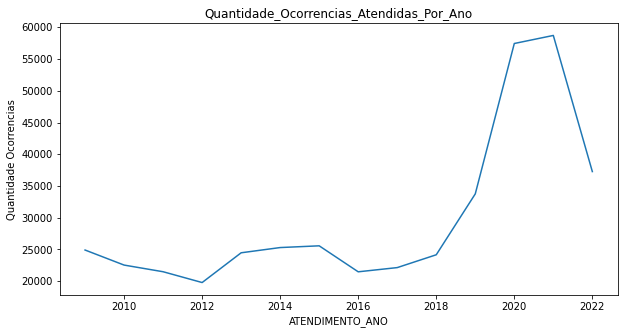

In [ ]:
criaGraficoLinha(ocorrenciasAtendidasPorAno, 'ATENDIMENTO_ANO', 'Quantidade_Ocorrencias_Atendidas_Por_Ano', 'Quantidade_Ocorrencias_Atendidas_Por_Ano', 'ATENDIMENTO_ANO', 'Quantidade Ocorrencias')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


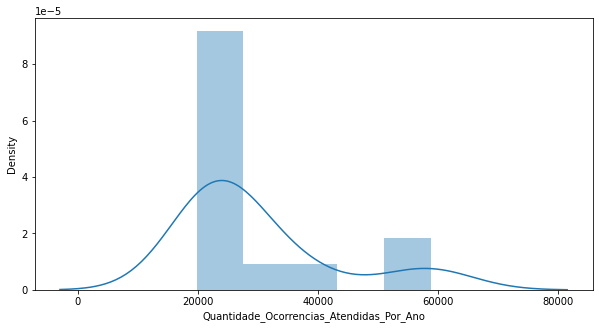

In [ ]:
criaGraficoDistribuicao(ocorrenciasAtendidasPorAno, 'Quantidade_Ocorrencias_Atendidas_Por_Ano')

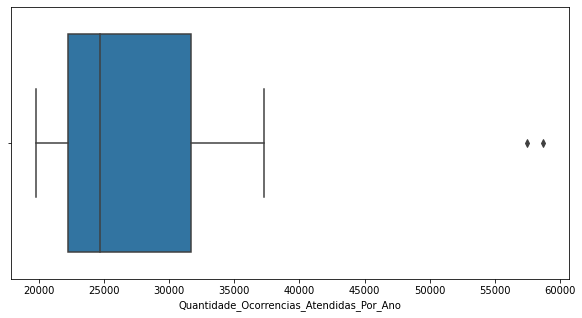

In [ ]:
criaGraficoBoxplot(ocorrenciasAtendidasPorAno, 'Quantidade_Ocorrencias_Atendidas_Por_Ano')

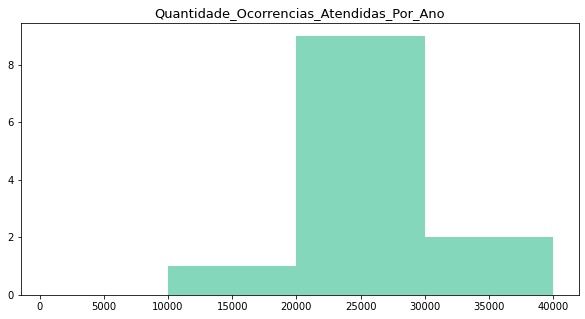

In [ ]:
bins = [500, 10000, 20000, 30000, 40000]

criaHistogramaComBins('Quantidade_Ocorrencias_Atendidas_Por_Ano', ocorrenciasAtendidasPorAno, bins, 'mediumaquamarine', 'Quantidade_Ocorrencias_Atendidas_Por_Ano')

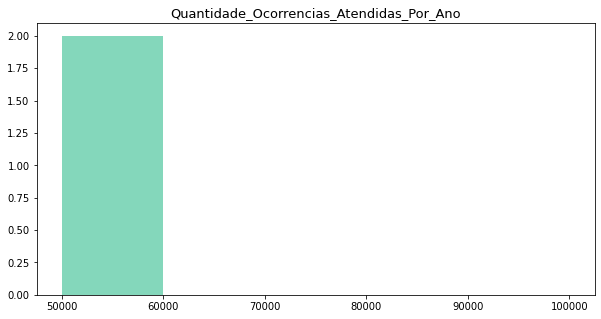

In [ ]:
bins = [50000, 60000, 70000, 80000, 100000]

criaHistogramaComBins('Quantidade_Ocorrencias_Atendidas_Por_Ano', ocorrenciasAtendidasPorAno, bins, 'mediumaquamarine', 'Quantidade_Ocorrencias_Atendidas_Por_Ano')

####**Ocorrencias Registradas Por Ano**


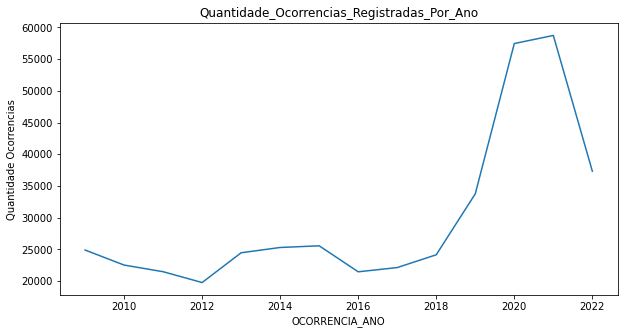

In [ ]:
criaGraficoLinha(ocorrenciasRegistradasPorAno, 'OCORRENCIA_ANO', 'Quantidade_Ocorrencias_Registradas_Por_Ano', 'Quantidade_Ocorrencias_Registradas_Por_Ano', 'OCORRENCIA_ANO', 'Quantidade Ocorrencias')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


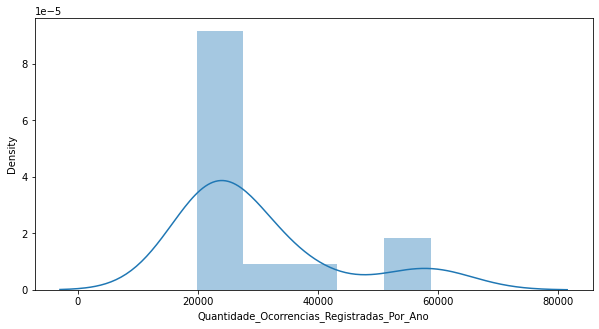

In [ ]:
criaGraficoDistribuicao(ocorrenciasRegistradasPorAno, 'Quantidade_Ocorrencias_Registradas_Por_Ano')

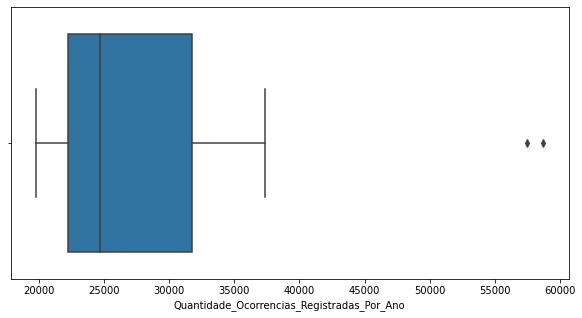

In [ ]:
criaGraficoBoxplot(ocorrenciasRegistradasPorAno, 'Quantidade_Ocorrencias_Registradas_Por_Ano')

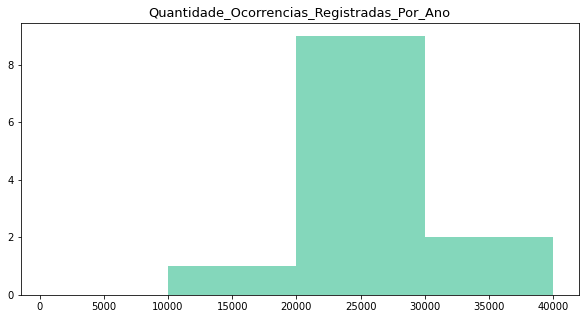

In [ ]:
bins = [500, 10000, 20000, 30000, 40000]

criaHistogramaComBins('Quantidade_Ocorrencias_Registradas_Por_Ano', ocorrenciasRegistradasPorAno, bins, 'mediumaquamarine', 'Quantidade_Ocorrencias_Registradas_Por_Ano')

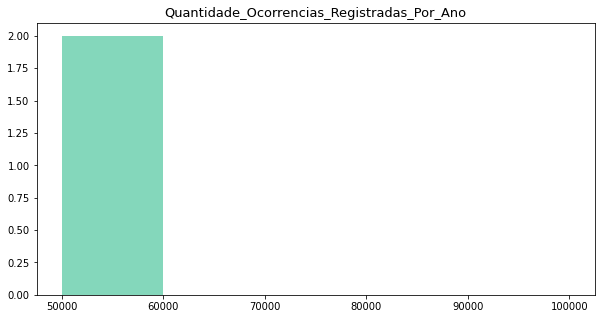

In [ ]:
bins = [50000, 60000, 70000, 80000, 100000]

criaHistogramaComBins('Quantidade_Ocorrencias_Registradas_Por_Ano', ocorrenciasRegistradasPorAno, bins, 'mediumaquamarine', 'Quantidade_Ocorrencias_Registradas_Por_Ano')

####**Ocorrencias Por Bairro**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


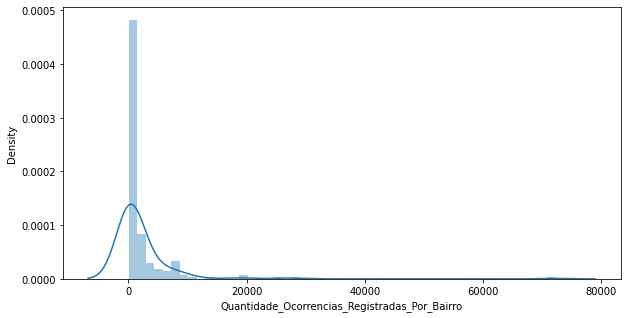

In [ ]:
criaGraficoDistribuicao(ocorrenciasPorBairro, 'Quantidade_Ocorrencias_Registradas_Por_Bairro')

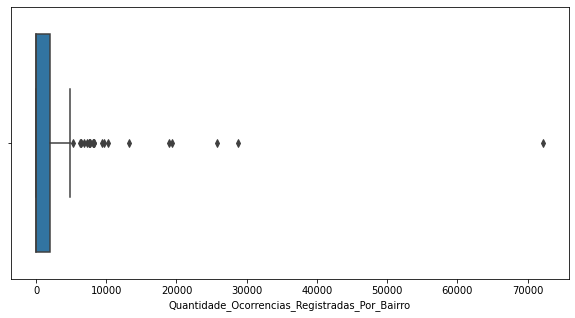

In [ ]:
criaGraficoBoxplot(ocorrenciasPorBairro, 'Quantidade_Ocorrencias_Registradas_Por_Bairro')

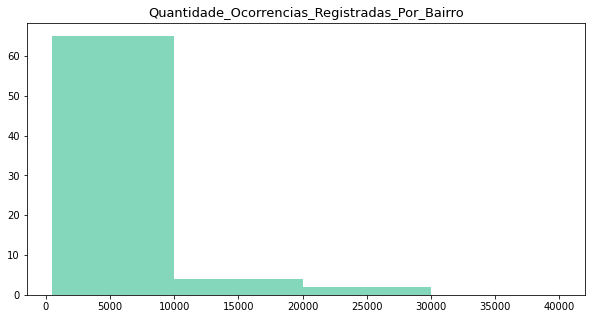

In [ ]:
bins = [500, 10000, 20000, 30000, 40000]

criaHistogramaComBins('Quantidade_Ocorrencias_Registradas_Por_Bairro', ocorrenciasPorBairro, bins, 'mediumaquamarine', 'Quantidade_Ocorrencias_Registradas_Por_Bairro')


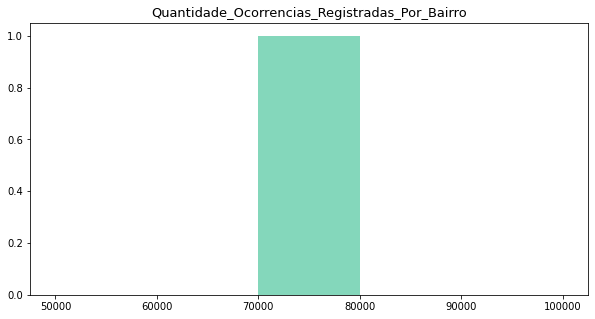

In [ ]:
bins = [50000, 60000, 70000, 80000, 100000]

criaHistogramaComBins('Quantidade_Ocorrencias_Registradas_Por_Bairro', ocorrenciasPorBairro, bins, 'mediumaquamarine', 'Quantidade_Ocorrencias_Registradas_Por_Bairro')

####**Ocorrencias Flagrante**

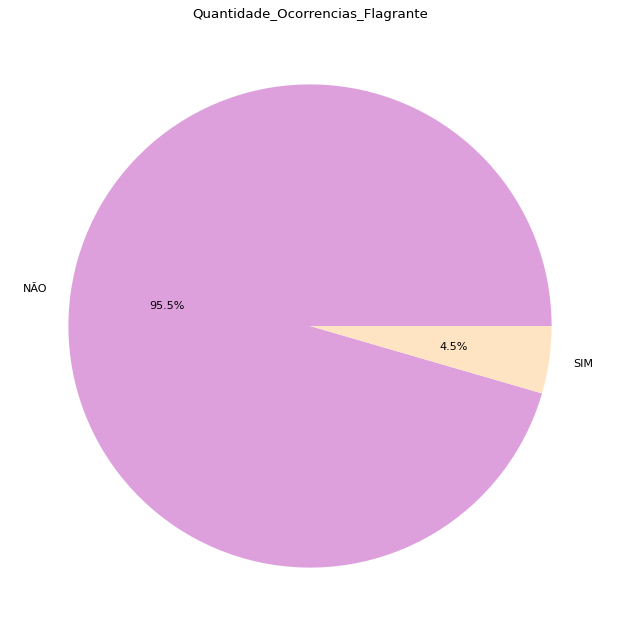

In [ ]:
quantidadeOcorrenciasFlagranteGraficoPizza = criaGraficoPizza(ocorrenciasFlagrante, 'Quantidade_Ocorrencias_Flagrante', 'FLAG_FLAGRANTE', 'Quantidade_Ocorrencias_Flagrante')

####**Ocorrencias Por Tipo**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


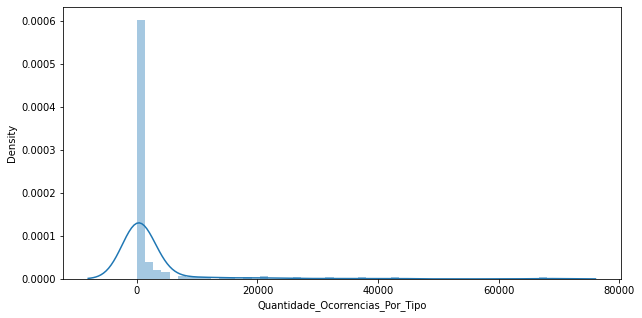

In [ ]:
criaGraficoDistribuicao(ocorrenciasPorTipo, 'Quantidade_Ocorrencias_Por_Tipo')

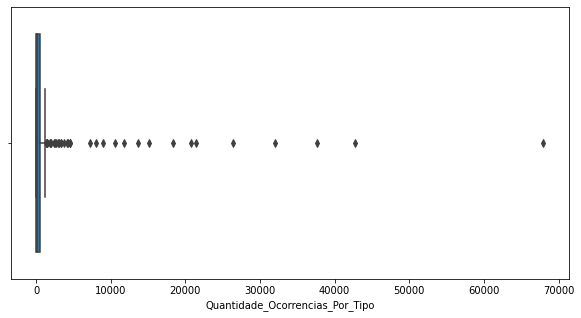

In [ ]:
criaGraficoBoxplot(ocorrenciasPorTipo, 'Quantidade_Ocorrencias_Por_Tipo')

####**Ocorrencias Por Dia**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


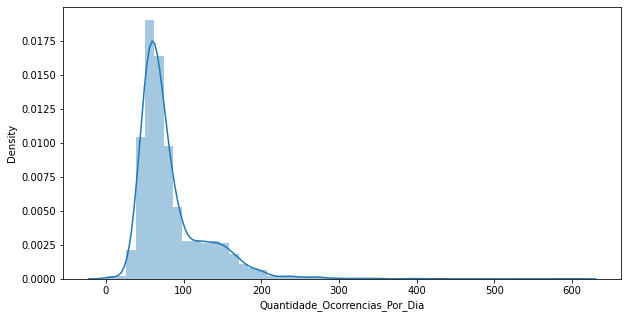

In [ ]:
criaGraficoDistribuicao(ocorrenciasPorDia, 'Quantidade_Ocorrencias_Por_Dia')

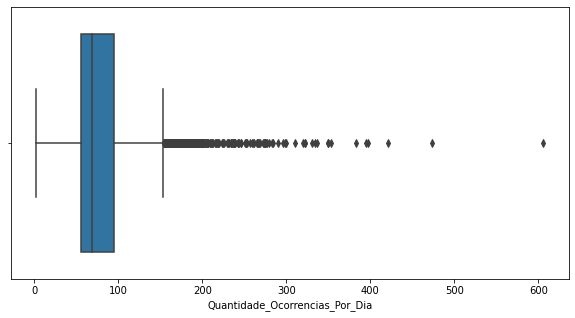

In [ ]:
criaGraficoBoxplot(ocorrenciasPorDia, 'Quantidade_Ocorrencias_Por_Dia')

####**Ocorrencias Por Dia Da Semana**


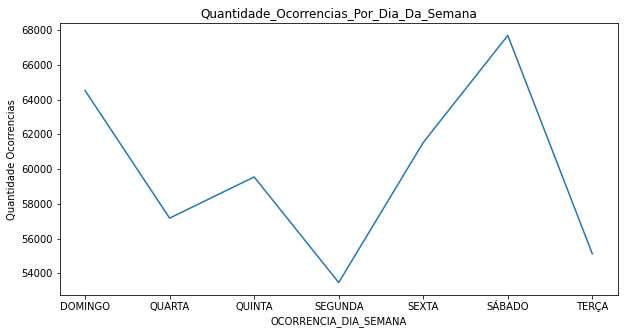

In [ ]:
criaGraficoLinha(ocorrenciasPorDiaDaSemana, 'OCORRENCIA_DIA_SEMANA', 'Quantidade_Ocorrencias_Por_Dia_Da_Semana', 'Quantidade_Ocorrencias_Por_Dia_Da_Semana', 'OCORRENCIA_DIA_SEMANA', 'Quantidade Ocorrencias')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


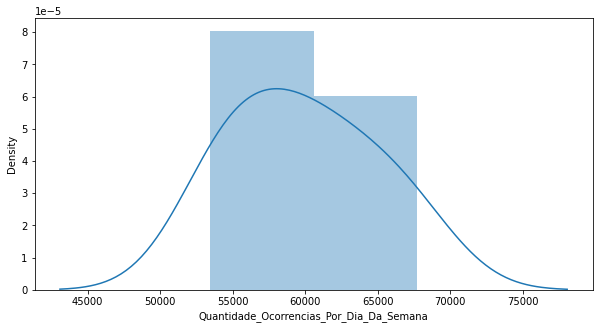

In [ ]:
criaGraficoDistribuicao(ocorrenciasPorDiaDaSemana, 'Quantidade_Ocorrencias_Por_Dia_Da_Semana')

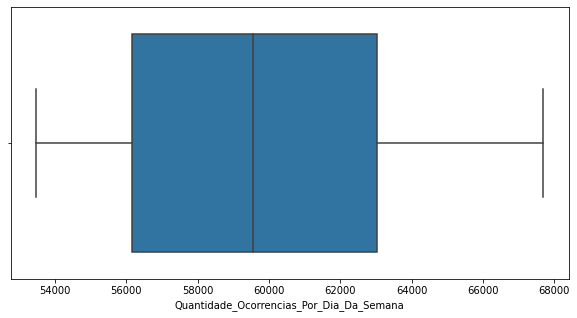

In [ ]:
criaGraficoBoxplot(ocorrenciasPorDiaDaSemana, 'Quantidade_Ocorrencias_Por_Dia_Da_Semana')

####**Ocorrencias Por Regional**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


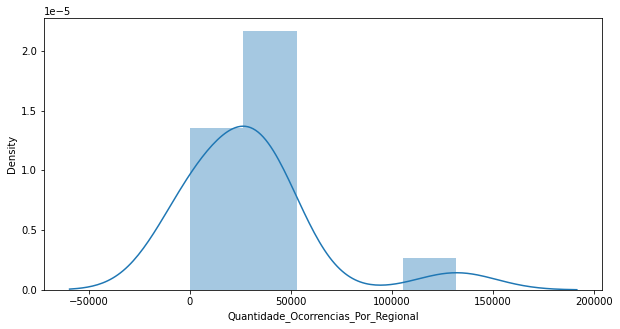

In [ ]:
criaGraficoDistribuicao(ocorrenciasPorRegional, 'Quantidade_Ocorrencias_Por_Regional')

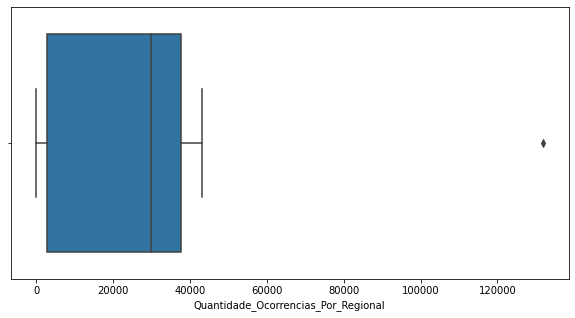

In [ ]:
criaGraficoBoxplot(ocorrenciasPorRegional, 'Quantidade_Ocorrencias_Por_Regional')

# **Análises com Spark**

### **Configurando o Spark**

In [ ]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [ ]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

### **Informação do dataset**

In [ ]:
sparkDF=spark.createDataFrame(df2) 
sparkDF.printSchema()
sparkDF.show()

root
 |-- ATENDIMENTO_ANO: double (nullable = true)
 |-- OCORRENCIA_ANO: long (nullable = true)
 |-- ATENDIMENTO_BAIRRO_NOME: string (nullable = true)
 |-- FLAG_FLAGRANTE: string (nullable = true)
 |-- NATUREZA1_DESCRICAO: string (nullable = true)
 |-- OCORRENCIA_DATA: string (nullable = true)
 |-- OCORRENCIA_DIA_SEMANA: string (nullable = true)
 |-- REGIONAL_FATO_NOME: string (nullable = true)
 |-- QUANTIDADE_OCORRENCIA: long (nullable = true)

+---------------+--------------+-----------------------+--------------+-------------------+---------------+---------------------+------------------+---------------------+
|ATENDIMENTO_ANO|OCORRENCIA_ANO|ATENDIMENTO_BAIRRO_NOME|FLAG_FLAGRANTE|NATUREZA1_DESCRICAO|OCORRENCIA_DATA|OCORRENCIA_DIA_SEMANA|REGIONAL_FATO_NOME|QUANTIDADE_OCORRENCIA|
+---------------+--------------+-----------------------+--------------+-------------------+---------------+---------------------+------------------+---------------------+
|         2009.0|          2009|     

In [ ]:
sparkDF.head()

Row(ATENDIMENTO_ANO=2009.0, OCORRENCIA_ANO=2009, ATENDIMENTO_BAIRRO_NOME='ABRANCHES', FLAG_FLAGRANTE='NÃO', NATUREZA1_DESCRICAO='AIFU', OCORRENCIA_DATA='2009-05-17', OCORRENCIA_DIA_SEMANA='DOMINGO', REGIONAL_FATO_NOME='BOA VISTA', QUANTIDADE_OCORRENCIA=1)

In [ ]:
sparkDF.describe().show()

+-------+-----------------+------------------+-----------------------+--------------+-------------------+---------------+---------------------+------------------+---------------------+
|summary|  ATENDIMENTO_ANO|    OCORRENCIA_ANO|ATENDIMENTO_BAIRRO_NOME|FLAG_FLAGRANTE|NATUREZA1_DESCRICAO|OCORRENCIA_DATA|OCORRENCIA_DIA_SEMANA|REGIONAL_FATO_NOME|QUANTIDADE_OCORRENCIA|
+-------+-----------------+------------------+-----------------------+--------------+-------------------+---------------+---------------------+------------------+---------------------+
|  count|           324463|            324463|                 324463|        324463|             324463|         324463|               324463|            324463|               324463|
|   mean|2016.310155549323|2016.3100600068421|                   null|          null|               null|           null|                 null|              null|   1.2908621321999736|
| stddev|4.125360146979848|  4.12533333626811|                   null|     

In [ ]:
sparkDF.printSchema()

root
 |-- ATENDIMENTO_ANO: double (nullable = true)
 |-- OCORRENCIA_ANO: long (nullable = true)
 |-- ATENDIMENTO_BAIRRO_NOME: string (nullable = true)
 |-- FLAG_FLAGRANTE: string (nullable = true)
 |-- NATUREZA1_DESCRICAO: string (nullable = true)
 |-- OCORRENCIA_DATA: string (nullable = true)
 |-- OCORRENCIA_DIA_SEMANA: string (nullable = true)
 |-- REGIONAL_FATO_NOME: string (nullable = true)
 |-- QUANTIDADE_OCORRENCIA: long (nullable = true)



### **Tratamento de dados**

- Contagem de linhas duplicadas

In [ ]:
import pyspark.sql.functions as funcs
sparkDF.groupby(sparkDF.columns).count().where(funcs.col('count') > 1).select(funcs.sum('count')).show()

+----------+
|sum(count)|
+----------+
|      null|
+----------+



- Achar colunas numericas e categoricas

In [ ]:
colunas_numericas = list()
colunas_categoricas = list()
for col_ in sparkDF.columns:
    if sparkDF.select(col_).dtypes[0][1] != "string":
        colunas_numericas.append(col_)
    else:
        colunas_categoricas.append(col_)
        
print("Colunas Numericas",colunas_numericas)
print("Colunas Categoricas",colunas_categoricas)

Colunas Numericas ['ATENDIMENTO_ANO', 'OCORRENCIA_ANO', 'QUANTIDADE_OCORRENCIA']
Colunas Categoricas ['ATENDIMENTO_BAIRRO_NOME', 'FLAG_FLAGRANTE', 'NATUREZA1_DESCRICAO', 'OCORRENCIA_DATA', 'OCORRENCIA_DIA_SEMANA', 'REGIONAL_FATO_NOME']


- Contagem de valores nulos

In [ ]:
from pyspark.sql.functions import *
print(sparkDF.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in sparkDF.columns]).show())

+---------------+--------------+-----------------------+--------------+-------------------+---------------+---------------------+------------------+---------------------+
|ATENDIMENTO_ANO|OCORRENCIA_ANO|ATENDIMENTO_BAIRRO_NOME|FLAG_FLAGRANTE|NATUREZA1_DESCRICAO|OCORRENCIA_DATA|OCORRENCIA_DIA_SEMANA|REGIONAL_FATO_NOME|QUANTIDADE_OCORRENCIA|
+---------------+--------------+-----------------------+--------------+-------------------+---------------+---------------------+------------------+---------------------+
|              0|             0|                      0|             0|                  0|              0|                    0|                 0|                    0|
+---------------+--------------+-----------------------+--------------+-------------------+---------------+---------------------+------------------+---------------------+

None


### **Análise descritiva de dados**

Métricas

In [ ]:
sparkDF.summary().show()

+-------+-----------------+------------------+-----------------------+--------------+-------------------+---------------+---------------------+------------------+---------------------+
|summary|  ATENDIMENTO_ANO|    OCORRENCIA_ANO|ATENDIMENTO_BAIRRO_NOME|FLAG_FLAGRANTE|NATUREZA1_DESCRICAO|OCORRENCIA_DATA|OCORRENCIA_DIA_SEMANA|REGIONAL_FATO_NOME|QUANTIDADE_OCORRENCIA|
+-------+-----------------+------------------+-----------------------+--------------+-------------------+---------------+---------------------+------------------+---------------------+
|  count|           324463|            324463|                 324463|        324463|             324463|         324463|               324463|            324463|               324463|
|   mean|2016.310155549323|2016.3100600068421|                   null|          null|               null|           null|                 null|              null|   1.2908621321999736|
| stddev|4.125360146979848|  4.12533333626811|                   null|     

# **Modelagem**

In [ ]:
from pyspark.sql.functions import percent_rank
from pyspark.sql import Window

sparkDFModel = sparkDF.withColumn("rank", percent_rank().over(Window.partitionBy().orderBy("OCORRENCIA_ANO")))

In [ ]:
sparkDFModel

DataFrame[ATENDIMENTO_ANO: double, OCORRENCIA_ANO: bigint, ATENDIMENTO_BAIRRO_NOME: string, FLAG_FLAGRANTE: string, NATUREZA1_DESCRICAO: string, OCORRENCIA_DATA: string, OCORRENCIA_DIA_SEMANA: string, REGIONAL_FATO_NOME: string, QUANTIDADE_OCORRENCIA: bigint, rank: double]

In [ ]:
train_df = sparkDFModel.where("rank <= .8").drop("rank")
train_df.show()

+---------------+--------------+-----------------------+--------------+-------------------+---------------+---------------------+------------------+---------------------+
|ATENDIMENTO_ANO|OCORRENCIA_ANO|ATENDIMENTO_BAIRRO_NOME|FLAG_FLAGRANTE|NATUREZA1_DESCRICAO|OCORRENCIA_DATA|OCORRENCIA_DIA_SEMANA|REGIONAL_FATO_NOME|QUANTIDADE_OCORRENCIA|
+---------------+--------------+-----------------------+--------------+-------------------+---------------+---------------------+------------------+---------------------+
|         2009.0|          2009|              ABRANCHES|           NÃO|               AIFU|     2009-05-17|              DOMINGO|         BOA VISTA|                    1|
|         2009.0|          2009|              ABRANCHES|           NÃO|               AIFU|     2009-05-28|               QUINTA|         BOA VISTA|                    1|
|         2009.0|          2009|              ABRANCHES|           NÃO|               AIFU|     2009-07-23|               QUINTA|         BOA VIS

In [ ]:
test_df = sparkDFModel.where("rank > .8").drop("rank")
test_df.show()

+---------------+--------------+-----------------------+--------------+--------------------+---------------+---------------------+--------------------+---------------------+
|ATENDIMENTO_ANO|OCORRENCIA_ANO|ATENDIMENTO_BAIRRO_NOME|FLAG_FLAGRANTE| NATUREZA1_DESCRICAO|OCORRENCIA_DATA|OCORRENCIA_DIA_SEMANA|  REGIONAL_FATO_NOME|QUANTIDADE_OCORRENCIA|
+---------------+--------------+-----------------------+--------------+--------------------+---------------+---------------------+--------------------+---------------------+
|         2022.0|          2022|    JARDIM PEDRO DEMETE|           NÃO|               Apoio|     2022-07-01|                SEXTA|REGIÃO METROPOLITANA|                    1|
|         2022.0|          2022|              ABRANCHES|           NÃO|Agressão física/v...|     2022-02-10|               QUINTA|           BOA VISTA|                    1|
|         2022.0|          2022|              ABRANCHES|           NÃO|Agressão física/v...|     2022-03-05|               SÁBADO|

In [ ]:
train_df = train_df.groupBy('OCORRENCIA_DATA').sum('QUANTIDADE_OCORRENCIA')

In [ ]:
train_df = train_df.withColumnRenamed("OCORRENCIA_DATA","ds") \
    .withColumnRenamed("sum(QUANTIDADE_OCORRENCIA)","y")

In [ ]:
train_df.show()

+----------+---+
|        ds|  y|
+----------+---+
|2009-05-17| 87|
|2009-05-28| 55|
|2009-07-23| 50|
|2009-11-16| 41|
|2009-09-03| 54|
|2009-09-27|107|
|2009-11-07| 96|
|2009-01-04| 93|
|2009-01-07| 70|
|2009-02-06| 74|
|2009-02-16| 53|
|2009-04-07| 54|
|2009-04-23| 60|
|2009-05-11| 57|
|2009-06-27| 86|
|2009-07-03| 64|
|2009-07-22| 49|
|2009-08-04| 63|
|2009-08-27| 49|
|2009-09-20|112|
+----------+---+
only showing top 20 rows



In [ ]:
train_df = train_df.toPandas()

In [ ]:
train_df

ds    y
0     2009-05-17   87
1     2009-05-28   55
2     2009-07-23   50
3     2009-11-16   41
4     2009-09-03   54
...          ...  ...
4743  2021-12-04  148
4744  2021-12-07  145
4745  2021-12-03  170
4746  2021-12-09  152
4747  2021-12-02  129

[4748 rows x 2 columns]

In [ ]:
from prophet import Prophet

In [ ]:
m = Prophet()
m = Prophet(yearly_seasonality = True, daily_seasonality=True)
m.fit(train_df)
m.yearly_seasonality
m.daily_seasonality

DEBUG:cmdstanpy:input tempfile: /tmp/tmpju1fv4pn/l7dbdmjl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpju1fv4pn/ms3jp9cu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59630', 'data', 'file=/tmp/tmpju1fv4pn/l7dbdmjl.json', 'init=/tmp/tmpju1fv4pn/ms3jp9cu.json', 'output', 'file=/tmp/tmpju1fv4pn/prophet_modelffp7gv_9/prophet_model-20221120184103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


True

In [ ]:
future = m.make_future_dataframe(periods=124) #Prevê os próximos 90 dias para comparar com a realidade e também o restante dos dias até o final de janeiro de 2019

forecast = m.predict(future) #Prevê 
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() #Mostra as predições (yhat) e intervalos de confiança: máximo (yhat_upper) e mínimo (yhat_lower)

ds        yhat  yhat_lower  yhat_upper
4867 2022-04-30  208.968225  173.412760  243.366437
4868 2022-05-01  204.863905  171.965964  239.563848
4869 2022-05-02  188.767131  155.346117  223.773896
4870 2022-05-03  190.888240  159.396108  224.613066
4871 2022-05-04  193.307337  159.020746  227.233597

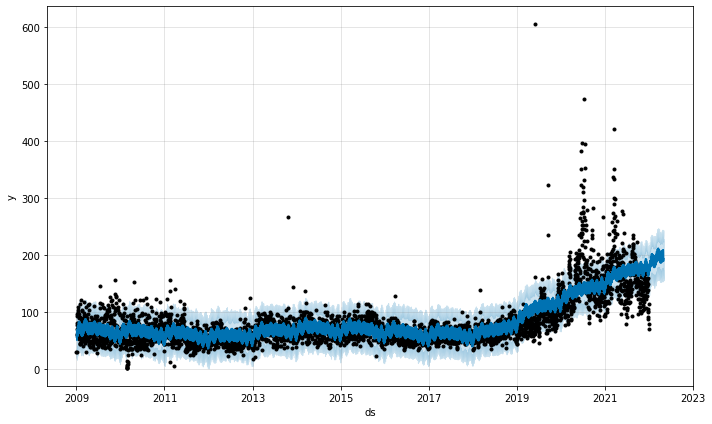

In [ ]:
fig = m.plot(forecast)

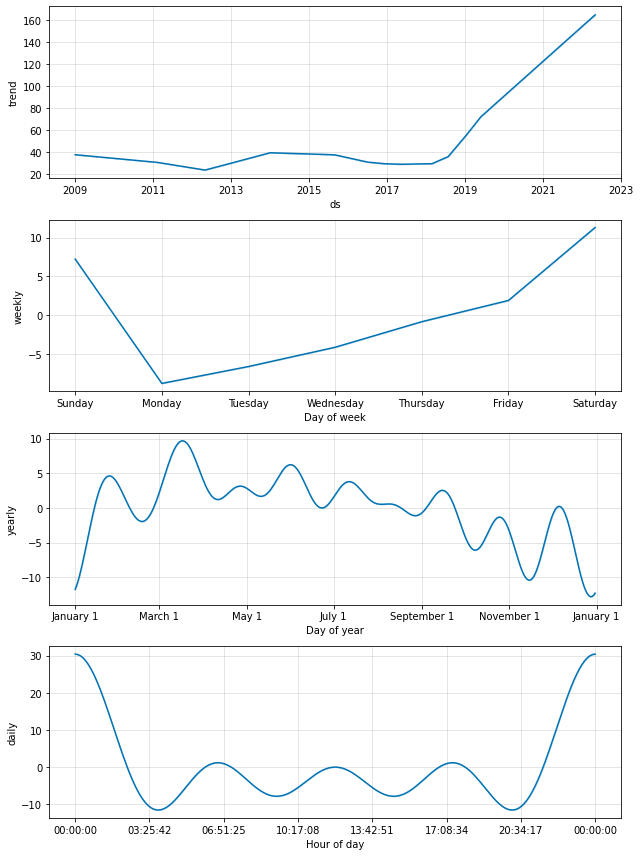

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.diagnostics import cross_validation

#criamos o dataframe de validação
dfCrossValidation = cross_validation(m, horizon='180 days')

INFO:prophet:Making 45 forecasts with cutoffs between 2010-08-31 00:00:00 and 2021-07-04 00:00:00


  0%|          | 0/45 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpju1fv4pn/628_pgd8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpju1fv4pn/5qjdkgm7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27719', 'data', 'file=/tmp/tmpju1fv4pn/628_pgd8.json', 'init=/tmp/tmpju1fv4pn/5qjdkgm7.json', 'output', 'file=/tmp/tmpju1fv4pn/prophet_modelpd02zvtx/prophet_model-20221120185514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:55:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:55:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpju1fv4pn/iiafhxu2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpju1fv4pn/wg4mvz22.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

/usr/local/lib/python3.7/dist-packages/prophet/plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


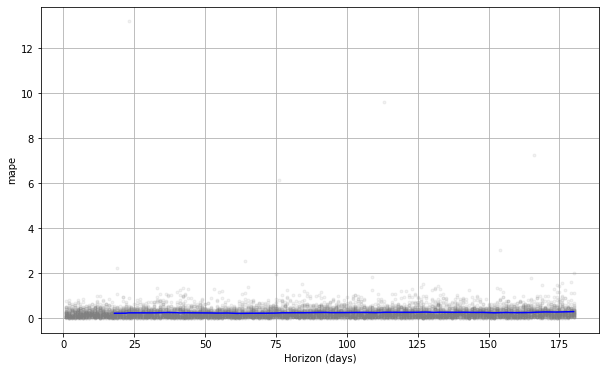

In [ ]:
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics

# extrai métricas de desempenho
dfPerformance = performance_metrics(dfCrossValidation)

# exibe métricas de desempenho em um gráfico
fig = plot_cross_validation_metric(dfCrossValidation, metric='mape')

In [ ]:
dfPerformance

horizon          mse       rmse        mae      mape     mdape     smape  \
0    18 days   809.770754  28.456471  17.361695  0.208333  0.173176  0.204159   
1    19 days   780.258640  27.933110  17.217533  0.211068  0.173176  0.205127   
2    20 days   651.117638  25.517007  16.853655  0.209461  0.171963  0.203969   
3    21 days   619.291761  24.885573  16.814322  0.212357  0.176917  0.205509   
4    22 days   625.482016  25.009638  16.933972  0.213101  0.176917  0.206282   
..       ...          ...        ...        ...       ...       ...       ...   
158 176 days  1557.714262  39.467889  23.984745  0.273284  0.214027  0.264168   
159 177 days  1570.984395  39.635646  24.301819  0.276842  0.217701  0.267955   
160 178 days  1533.543369  39.160482  24.216031  0.277067  0.220457  0.267751   
161 179 days  1475.142364  38.407582  24.309637  0.281272  0.223604  0.271480   
162 180 days  1410.120298  37.551569  24.210060  0.283598  0.225037  0.272226   

     coverage  
0    0.745679  
1    0.741975  
2    0.746914  
3    0.741975  
4    0.734568  
..        ...  
158  0.612346  
159  0.606173  
160  0.604938  
161  0.600000  
162  0.597531  

[163 rows x 8 columns]